In [4]:
import pandas as pd

In [5]:
import time

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize # ใช้ในการตัดคำ

In [7]:
import pythainlp
from pythainlp.corpus import thai_stopwords
from pythainlp.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.corpus import words
from stop_words import get_stop_words

In [8]:
import time
import requests
url = "https://api.aiforthai.in.th/tlexplus"
headers = {
    'Apikey': "TcFxpsM6D7Hen9iWO5CnvHlNv8fsyBwW"
    }

In [9]:
import nltk
nltk.download('words')
th_stop = ' '.join(list(thai_stopwords()))
#th_stop = tuple(thai_stopwords('thai'))
en_stop = tuple(get_stop_words('en'))
p_stemmer = PorterStemmer()

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [10]:
def split_word(text):
     
    tokens = word_tokenize(text,engine='newmm')
   # url = "https://api.aiforthai.in.th/tlexplus"
    #headers = {'Apikey': "TcFxpsM6D7Hen9iWO5CnvHlNv8fsyBwW"}
    #data = {'text':text}
   # respons = requests.post(url, data=data ,headers=headers)
    #tokens = respons.json()['tokens']
    #data_all.append(data1.json()['tokens'])

    # Remove stop words ภาษาไทย และภาษาอังกฤษ
    tokens = [i for i in tokens if not i in th_stop and not i in en_stop]
    
    # หารากศัพท์ภาษาไทย และภาษาอังกฤษ
    # English
    tokens = [p_stemmer.stem(i) for i in tokens]
    
    # Thai
    tokens_temp=[]
    for i in tokens:
        w_syn = wordnet.synsets(i)
        if (len(w_syn)>0) and (len(w_syn[0].lemma_names('tha'))>0):
            tokens_temp.append(w_syn[0].lemma_names('tha')[0])
        else:
            tokens_temp.append(i)
    
    tokens = tokens_temp
    
    # ลบตัวเลข
    tokens = [i for i in tokens if not i.isnumeric()]
    
    # ลบช่องว่าง
    tokens = [i for i in tokens if not ' ' in i]

    return tokens

In [11]:
Clean_all = pd.read_excel("Clean_all.xlsx", header=[0])

In [12]:
Clean_all

คำถาม  \
0     กราบเรียนท่านรมวกระทรวงยุติรรมกระผมขอร้องเรียน...   
1     ตอนนี้พี่ชายเพิ่งติดคุกพิพากษาอุธรวันที่กันยาย...   
2     รบกวนท่านรัฐมนตรีช่วยดูเรื่องการจ่ายเงินคืนของ...   
3     เรียนพณท่านรัฐมนตรีว่าการกระทรวงยุติธรรมที่เคา...   
4                              โปรดให้ความช่วยเหลือด้วย   
...                                                 ...   
1587  นายจ้างสามารถเลิกจ้างพนักงานที่ใช้คอมพิวเตอร์ข...   
1588  วันนี้มีลูกจ้างโทรศัพท์มาสอบถามว่าตนเองได้รับอ...   
1589  เนื่องจากสามีไม่เคยส่งค่าเลี้ยงดูบุตรและยังมีภ...   
1590  มีเจ้าหน้าที่ในองค์กรพัฒนาเอกชนหลายคนมักส่งมาถ...   
1591  เมื่อหลายวันมาแล้วมีลูกจ้างคนหนึ่งโทรมาคุยกับผ...   

                                                  คำตอบ  
0     กรมพินิจไม่เคยยกเลิกบัญชีผู้สอบแข่งขันของพนักง...  
1     ถือว่าอยู่ในหน่วยศาลขึ้นต่อสงขลาร้องขอที่รจโดย...  
2     เรียนคุณรณกรอนันต์กระทรวงยุติธรรมโดยกรมบังคับค...  
3     เรียนพณท่านรัฐมนตรีว่าการกระทรวงยุติธรรมที่เคา...  
4     เรียนคุณตามที่ท่านได้ร้องทุกข์มานั้นกระทรวงยุต...  
...                                                 ...  
1587  โดยทั่วไปแล้วการกระทำใดจะเป็นความผิดร้ายแรงหรื...  
1588  ตามพระราชบัญญัติประกันสังคมพศไม่มีบทบัญญัติใดท...  
1589  การอุปการะเลี้ยงดูหรือยกย่องหญิงอื่นฉันภริยาเป...  
1590  ก่อนที่จะถึงคำตอบของคำถามนี้มีตัวอย่างน่าสนใจโ...  
1591  ในกรณีนี้หลังจากสืบข้อเท็จจริงเพิ่มเติมผมได้ให...  

[1592 rows x 2 columns]

In [13]:
Clean_all.drop(Clean_all[Clean_all['คำตอบ'] == 'หวยออนไลน์' ].index , inplace=True)

In [14]:
Clean_all.reset_index(drop=True,inplace=True)

In [15]:
Clean_all

คำถาม  \
0     กราบเรียนท่านรมวกระทรวงยุติรรมกระผมขอร้องเรียน...   
1     ตอนนี้พี่ชายเพิ่งติดคุกพิพากษาอุธรวันที่กันยาย...   
2     รบกวนท่านรัฐมนตรีช่วยดูเรื่องการจ่ายเงินคืนของ...   
3     เรียนพณท่านรัฐมนตรีว่าการกระทรวงยุติธรรมที่เคา...   
4                              โปรดให้ความช่วยเหลือด้วย   
...                                                 ...   
1538  นายจ้างสามารถเลิกจ้างพนักงานที่ใช้คอมพิวเตอร์ข...   
1539  วันนี้มีลูกจ้างโทรศัพท์มาสอบถามว่าตนเองได้รับอ...   
1540  เนื่องจากสามีไม่เคยส่งค่าเลี้ยงดูบุตรและยังมีภ...   
1541  มีเจ้าหน้าที่ในองค์กรพัฒนาเอกชนหลายคนมักส่งมาถ...   
1542  เมื่อหลายวันมาแล้วมีลูกจ้างคนหนึ่งโทรมาคุยกับผ...   

                                                  คำตอบ  
0     กรมพินิจไม่เคยยกเลิกบัญชีผู้สอบแข่งขันของพนักง...  
1     ถือว่าอยู่ในหน่วยศาลขึ้นต่อสงขลาร้องขอที่รจโดย...  
2     เรียนคุณรณกรอนันต์กระทรวงยุติธรรมโดยกรมบังคับค...  
3     เรียนพณท่านรัฐมนตรีว่าการกระทรวงยุติธรรมที่เคา...  
4     เรียนคุณตามที่ท่านได้ร้องทุกข์มานั้นกระทรวงยุต...  
...                                                 ...  
1538  โดยทั่วไปแล้วการกระทำใดจะเป็นความผิดร้ายแรงหรื...  
1539  ตามพระราชบัญญัติประกันสังคมพศไม่มีบทบัญญัติใดท...  
1540  การอุปการะเลี้ยงดูหรือยกย่องหญิงอื่นฉันภริยาเป...  
1541  ก่อนที่จะถึงคำตอบของคำถามนี้มีตัวอย่างน่าสนใจโ...  
1542  ในกรณีนี้หลังจากสืบข้อเท็จจริงเพิ่มเติมผมได้ให...  

[1543 rows x 2 columns]

In [16]:
print('tokenized text:\n',split_word(Clean_all["คำถาม"][2]))

tokenized text:
 ['รบกวน', 'รัฐมนตรี', 'ดู', 'เรื่อง', 'จ่าย', 'เงิน', 'กรมบังคับคดี', 'บริษัท', 'สัมพันธ์', 'ทำประกัน', 'รับคืน', 'ยอด', 'วิธี', 'ที่ทาง', 'รัฐ', 'จ่าย', 'คืนให้', 'ข้อกฎหมาย', 'คปภ', 'รองจ่าย']


# คำถาม

In [17]:
data_Q = []

#tokens_list = [split_word(txt) for txt in clean_text]
for i in range(len(Clean_all)):
    tokens_list = split_word(Clean_all["คำถาม"][i])
    data_Q.append(tokens_list)
    #time.sleep(0.5)

In [18]:
data_Q

[['กราบเรียน',
  'รมว',
  'กระทรวง',
  'ยุติ',
  'รร',
  'ร้องเรียน',
  'ความยุติธรรม',
  'สอบ',
  'พนักงาน',
  'ราชการ',
  'กรม',
  'พินิจ',
  'คุ้มครอง',
  'เด็ก',
  'ยช.',
  'สอบ',
  'พนักงาน',
  'ราชการ',
  'ขอบเขต',
  'ในขณะที่',
  'ยังมี',
  'บัญชี',
  'สอบ',
  'ตัวสำรอง',
  'ขึ้นบัญชี',
  'สอบแข่งขัน',
  'แต่วัน',
  'ขึ้นบัญชี',
  'สอบ',
  'กรม',
  'พินิจ',
  'คุ้มครอง',
  'เด็ก',
  'ยช.',
  'ตัวสำรอง',
  'เข้าทำงาน',
  'ตำแหน่งว่าง',
  'แต่กลับ',
  'วิธี',
  'สอบ',
  'ขอบเขต',
  'สอบ',
  'สำรอง',
  'เข้าทำงาน',
  'ทราบ',
  'ประกาศ',
  'รับสมัคร',
  'กรม',
  'พินิจ',
  'คุ้มครอง',
  'เด็ก',
  'ยช.',
  'ระบุ',
  'ปัจจัย',
  'ยกเลิก',
  'บัญชี',
  'สอบ',
  'แต่วัน',
  'ขึ้นบัญชี',
  'สอบ',
  'ขอบเขต',
  'กรม',
  'พินิจ',
  'ปัจจัย',
  'ตัด',
  'โอกาส',
  'เข้าทำงาน',
  'สอบ',
  'สำรอง',
  'สอบ',
  'มาถึง',
  'รับสมัคร',
  'ขอบเขต',
  'ครั้งแรก',
  'ประกาศ',
  'วัน',
  'ส.ค.',
  'ที่ประกาศ',
  'วัน',
  'ส.ค.',
  'ปชช.',
  'นึง',
  'แสวงหา',
  'ความยุติธรรม',
  'ในขณะที่',
  'ยุค',


In [19]:
len(data_Q)

1543

# คำตอบ

In [20]:
data_anw = []

#tokens_list = [split_word(txt) for txt in clean_text]
for i in range(len(Clean_all)):
    tokens_list = split_word(Clean_all["คำตอบ"][i])
    data_anw.append(tokens_list)
    #time.sleep(0.5)

In [21]:
data_anw

[['กรม',
  'พินิจ',
  'ยกเลิก',
  'บัญชี',
  'สอบแข่งขัน',
  'พนักงาน',
  'ราชการ',
  'ขึ้นบัญชี',
  'อ้าง',
  'บัญชี',
  'สอบแข่งขัน',
  'ขอบเขต',
  'ที่ประกาศ',
  'ขึ้นบัญชี',
  'ใช้ได้',
  'เขต',
  'ขึ้นบัญชี',
  'กรม',
  'พินิจ',
  'พื้นที่',
  'ขอบเขต',
  'ขึ้นบัญชี',
  'จึุง',
  'สอบ',
  'ขอบเขต',
  'บัญชี',
  'ใช้กับ',
  'ขอบเขต',
  'พื้นที่',
  'ขึ้นบัญชี',
  'กรม',
  'พินิจ'],
 ['หน่วย',
  'ศาล',
  'สงขลา',
  'ร้องขอ',
  'รจ',
  'คณะกรรมการ',
  'พิจารณา',
  'คณะทำงาน',
  'รัฐมนตรี',
  'ว่าการ',
  'กระทรวงยุติธรรม'],
 ['เรียน',
  'อนันต์',
  'กระทรวงยุติธรรม',
  'กรมบังคับคดี',
  'เรียน',
  'คดี',
  'เจ้าหนี้',
  'ยื่นคำขอ',
  'ชำระหนี้',
  'จำนวน',
  'เจ้าพนักงานพิทักษ์ทรัพย์',
  'บัญชี',
  'แบ่ง',
  'ทรัพย์สิน',
  'บรรดา',
  'เจ้าหนี้',
  'วัน',
  'ส.ค.',
  'เจ้าหนี้',
  'รับเงิน',
  'ส่วนแบ่ง',
  'ทรัพย์สิน',
  'จำนวน',
  'ร้อยละ',
  'ยอด',
  'หนี้',
  'ศาล',
  'งาน',
  'ชำระหนี้',
  'เงิน',
  'บ.',
  'เจ้าพนักงานพิทักษ์ทรัพย์',
  'จ่าย',
  'เงิน',
  'ส่วนแบ่ง',
  'เจ้าหนี้'

In [22]:
len(data_anw)

1543

# Bag of words + count word >>> คำถาม <<<

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
tokens_list_j = [','.join(tkn) for tkn in data_Q]
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
c_feat = cvec.fit_transform(tokens_list_j)

In [24]:
bag_Q = cvec.vocabulary_

In [25]:
bag_Q

{'กราบเรียน': 106,
 'รมว': 2709,
 'กระทรวง': 78,
 'ยุติ': 2657,
 'รร': 2711,
 'ร้องเรียน': 2888,
 'ความยุติธรรม': 641,
 'สอบ': 3275,
 'พนักงาน': 2266,
 'ราชการ': 2810,
 'กรม': 52,
 'พินิจ': 2350,
 'คุ้มครอง': 770,
 'เด็ก': 4013,
 'ยช.': 2595,
 'ขอบเขต': 392,
 'ในขณะที่': 4741,
 'ยังมี': 2616,
 'บัญชี': 1874,
 'ตัวสำรอง': 1290,
 'ขึ้นบัญชี': 440,
 'สอบแข่งขัน': 3280,
 'แต่วัน': 4460,
 'เข้าทำงาน': 3853,
 'ตำแหน่งว่าง': 1349,
 'แต่กลับ': 4455,
 'วิธี': 3098,
 'สำรอง': 3353,
 'ทราบ': 1500,
 'ประกาศ': 1982,
 'รับสมัคร': 2791,
 'ระบุ': 2735,
 'ปัจจัย': 2063,
 'ยกเลิก': 2594,
 'ตัด': 1277,
 'โอกาส': 4697,
 'มาถึง': 2496,
 'ครั้งแรก': 573,
 'วัน': 3058,
 'ส.ค.': 3176,
 'ที่ประกาศ': 1628,
 'ปชช.': 1951,
 'นึง': 1804,
 'แสวงหา': 4579,
 'ยุค': 2656,
 'การนำ': 228,
 'ลด': 2925,
 'เหลือม': 4371,
 'ล้ำ': 3034,
 'รู้': 2863,
 'อ่าน': 3774,
 'แมสเซจ': 4534,
 'ลูกน้อง': 3001,
 'หวัง': 3562,
 'ฟัง': 2394,
 'เสียง': 4334,
 'ลูก': 2994,
 'ทหาร': 1507,
 'ตอนนี้': 1257,
 'พี่ชาย': 2366,
 'ติดคุก': 1356,
 '

In [26]:
len(bag_Q)

4942

In [27]:
c_feat[:,:1000].todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Bag of words + count word >>> คำตอบ <<<

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
tokens_list_k = [','.join(tkn) for tkn in data_anw]
cvecA = CountVectorizer(analyzer=lambda x:x.split(','))
c_featA = cvecA.fit_transform(tokens_list_k)

In [29]:
bag_A = cvecA.vocabulary_

In [30]:
bag_A

{'กรม': 60,
 'พินิจ': 2691,
 'ยกเลิก': 2988,
 'บัญชี': 2163,
 'สอบแข่งขัน': 3758,
 'พนักงาน': 2607,
 'ราชการ': 3225,
 'ขึ้นบัญชี': 521,
 'อ้าง': 4346,
 'ขอบเขต': 465,
 'ที่ประกาศ': 1882,
 'ใช้ได้': 5464,
 'เขต': 4407,
 'พื้นที่': 2713,
 'จึุง': 1120,
 'สอบ': 3753,
 'ใช้กับ': 5449,
 'หน่วย': 3990,
 'ศาล': 3599,
 'สงขลา': 3637,
 'ร้องขอ': 3308,
 'รจ': 3094,
 'คณะกรรมการ': 594,
 'พิจารณา': 2686,
 'คณะทำงาน': 595,
 'รัฐมนตรี': 3172,
 'ว่าการ': 3569,
 'กระทรวงยุติธรรม': 108,
 'เรียน': 4870,
 'อนันต์': 4166,
 'กรมบังคับคดี': 72,
 'คดี': 600,
 'เจ้าหนี้': 4552,
 'ยื่นคำขอ': 3059,
 'ชำระหนี้': 1220,
 'จำนวน': 1102,
 'เจ้าพนักงานพิทักษ์ทรัพย์': 4549,
 'แบ่ง': 5183,
 'ทรัพย์สิน': 1734,
 'บรรดา': 2123,
 'วัน': 3497,
 'ส.ค.': 3629,
 'รับเงิน': 3209,
 'ส่วนแบ่ง': 3955,
 'ร้อยละ': 3315,
 'ยอด': 2997,
 'หนี้': 3983,
 'งาน': 1032,
 'เงิน': 4489,
 'บ.': 2111,
 'จ่าย': 1133,
 'บางส่วน': 2183,
 'ยังมี': 3013,
 'ทยอย': 1723,
 'ต่อเนื่อง': 1609,
 'บางราย': 2181,
 'ยื่น': 3057,
 'คำร้องขอ': 890,
 'ระบบ': 31

In [31]:
len(bag_A)

5691

In [32]:
c_featA[:,:1000].todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Words Cloud >> คำถาม << 

In [33]:
from wordcloud import WordCloud 

In [34]:
pwd

'C:\\Users\\LENOVO\\Documents\\LegalDoc_project4'

In [35]:
path =  'C:\\Users\\LENOVO\\Documents\\LegalDoc_project4\\THSarabunNew Bold.ttf'
stopwords = ["และ","เช่น","ครับ","หรือ","ๆ","อยู่แล้ว","มากขึ้น","ต่างๆ","ได้","ณ","คะ","ด้าน","เป็น","หา","กับ","ด้วย","!","กราบเรียน","๑"]

wc = WordCloud(font_path=path, # path ที่ตั้ง Font
                      stopwords = stopwords, # ลบคำที่ไม่ใช้ออก
                      background_color="white", # ตั้งค่าพืสี้นหลัง
                      regexp=r"[\u0E00-\u0E7Fa-zA-Zก-ฮ']+" # ป้องกัน bug วรรณยุกต์
                      )

In [36]:
wc.generate_from_frequencies(bag_Q)
wc.to_file('wc.png')

(-0.5, 399.5, 199.5, -0.5)

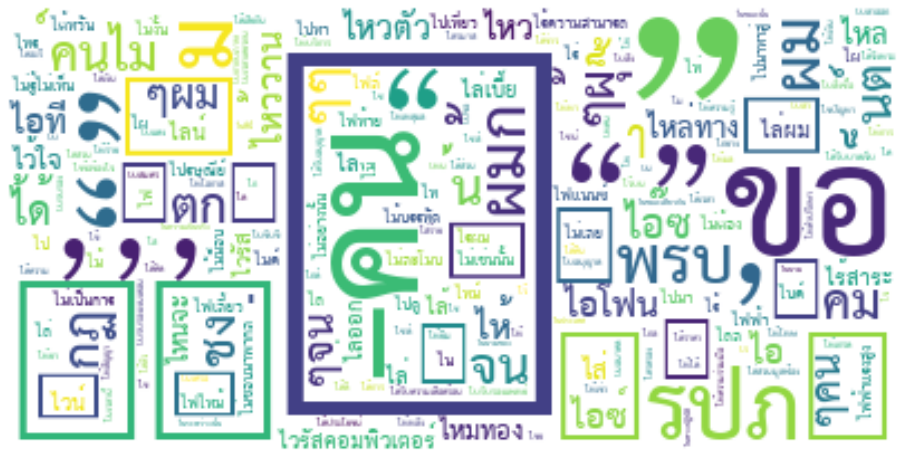

In [37]:
plt.figure(figsize = (16, 16))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")

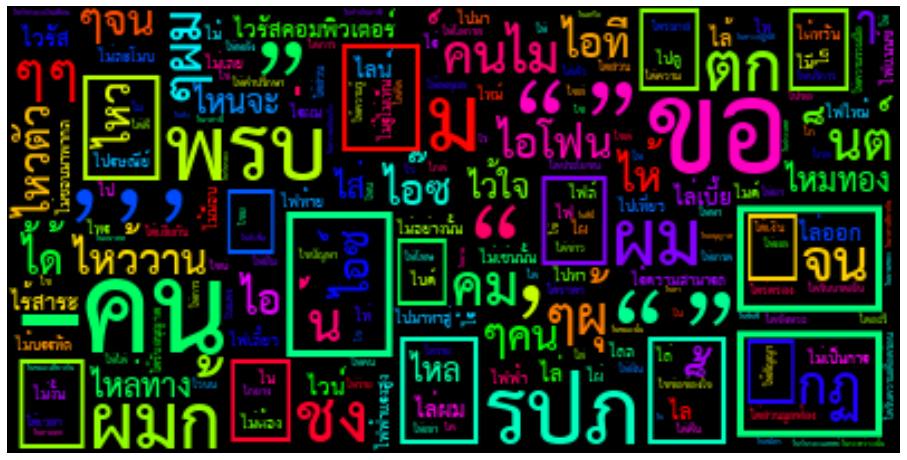

In [38]:
from collections import Counter
#dictionary=Counter(data_Q)
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(font_path=path, max_font_size=80,colormap="hsv").generate_from_frequencies(bag_Q)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
regexp = r"[ก-๙a-zA-Z']+"
#path = 'C:/Users/LENOVO/Documents/LegalDoc_project4/THSarabunNew Bold.ttf'
path = 'C:\\Users\\LENOVO\\Documents\\LegalDoc_project4\\THSarabunNew Bold.ttf'
#path = '/content/THSarabunNew.ttf'

(-0.5, 324.5, 259.5, -0.5)

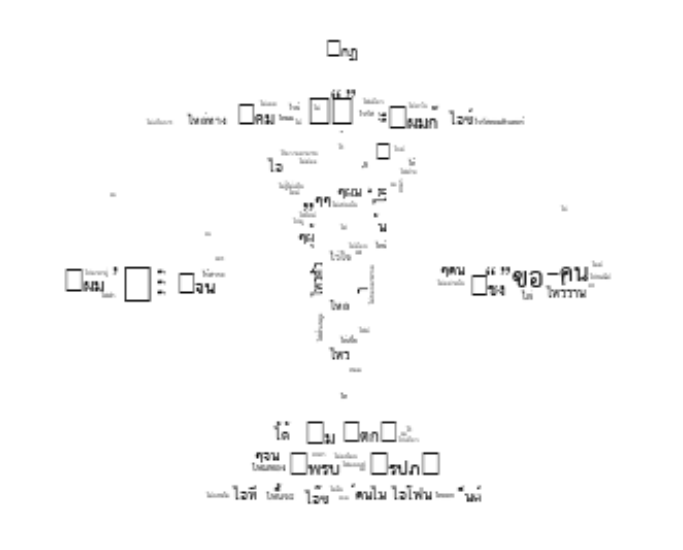

In [40]:
from PIL import Image
import numpy as np
med_mask = np.array(Image.open("de4c01c03293d81ce82e7df9c1d6c473.png"))

# Custom Colormap
from matplotlib.colors import LinearSegmentedColormap
colors = ["#000000", "#111111", "#101010", "#121212", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

wc = WordCloud(font_path=path, background_color="white", mask=med_mask, colormap=cmap)
wc.generate_from_frequencies(bag_Q)
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [41]:
import re
import string

In [42]:
freq={}

In [43]:
data_Q[:3]

[['กราบเรียน',
  'รมว',
  'กระทรวง',
  'ยุติ',
  'รร',
  'ร้องเรียน',
  'ความยุติธรรม',
  'สอบ',
  'พนักงาน',
  'ราชการ',
  'กรม',
  'พินิจ',
  'คุ้มครอง',
  'เด็ก',
  'ยช.',
  'สอบ',
  'พนักงาน',
  'ราชการ',
  'ขอบเขต',
  'ในขณะที่',
  'ยังมี',
  'บัญชี',
  'สอบ',
  'ตัวสำรอง',
  'ขึ้นบัญชี',
  'สอบแข่งขัน',
  'แต่วัน',
  'ขึ้นบัญชี',
  'สอบ',
  'กรม',
  'พินิจ',
  'คุ้มครอง',
  'เด็ก',
  'ยช.',
  'ตัวสำรอง',
  'เข้าทำงาน',
  'ตำแหน่งว่าง',
  'แต่กลับ',
  'วิธี',
  'สอบ',
  'ขอบเขต',
  'สอบ',
  'สำรอง',
  'เข้าทำงาน',
  'ทราบ',
  'ประกาศ',
  'รับสมัคร',
  'กรม',
  'พินิจ',
  'คุ้มครอง',
  'เด็ก',
  'ยช.',
  'ระบุ',
  'ปัจจัย',
  'ยกเลิก',
  'บัญชี',
  'สอบ',
  'แต่วัน',
  'ขึ้นบัญชี',
  'สอบ',
  'ขอบเขต',
  'กรม',
  'พินิจ',
  'ปัจจัย',
  'ตัด',
  'โอกาส',
  'เข้าทำงาน',
  'สอบ',
  'สำรอง',
  'สอบ',
  'มาถึง',
  'รับสมัคร',
  'ขอบเขต',
  'ครั้งแรก',
  'ประกาศ',
  'วัน',
  'ส.ค.',
  'ที่ประกาศ',
  'วัน',
  'ส.ค.',
  'ปชช.',
  'นึง',
  'แสวงหา',
  'ความยุติธรรม',
  'ในขณะที่',
  'ยุค',


In [44]:
flat_list = []
for sublist in data_Q:
    for item in sublist:
        flat_list.append(item)

In [45]:
for word in flat_list:
    count=freq.get(word,0)
    freq[word]=count + 1

In [46]:
frequency_list = freq.keys()

In [47]:
for words in frequency_list:
    print(words + ' -> ' + str(freq[words]))

กราบเรียน -> 1
รมว -> 1
กระทรวง -> 6
ยุติ -> 12
รร -> 59
ร้องเรียน -> 26
ความยุติธรรม -> 3
สอบ -> 32
พนักงาน -> 343
ราชการ -> 116
กรม -> 108
พินิจ -> 4
คุ้มครอง -> 45
เด็ก -> 131
ยช. -> 4
ขอบเขต -> 65
ในขณะที่ -> 55
ยังมี -> 71
บัญชี -> 108
ตัวสำรอง -> 2
ขึ้นบัญชี -> 3
สอบแข่งขัน -> 1
แต่วัน -> 57
เข้าทำงาน -> 32
ตำแหน่งว่าง -> 1
แต่กลับ -> 6
วิธี -> 75
สำรอง -> 3
ทราบ -> 529
ประกาศ -> 31
รับสมัคร -> 7
ระบุ -> 95
ปัจจัย -> 21
ยกเลิก -> 26
ตัด -> 72
โอกาส -> 8
มาถึง -> 21
ครั้งแรก -> 42
วัน -> 385
ส.ค. -> 77
ที่ประกาศ -> 1
ปชช. -> 61
นึง -> 45
แสวงหา -> 2
ยุค -> 2
การนำ -> 6
ลด -> 58
เหลือม -> 1
ล้ำ -> 2
รู้ -> 205
อ่าน -> 31
แมสเซจ -> 78
ลูกน้อง -> 59
หวัง -> 3
ฟัง -> 79
เสียง -> 10
ลูก -> 251
ทหาร -> 9
ตอนนี้ -> 523
พี่ชาย -> 263
ติดคุก -> 83
พิพากษา -> 14
อุ -> 3
ธร -> 4
กันยายน -> 22
ติด -> 228
รัฐ -> 52
สงขลา -> 3
สาเหตุ -> 19
ย้าย -> 142
บ้าน -> 570
ย้าม -> 1
ชนบท -> 62
เหลืออยู่ -> 55
พ่อ -> 634
อายุ -> 267
ไป -> 31
ยากลำบาก -> 1
อยู่ -> 105
รถบัส -> 1
เดือน -> 619
ไปดู -> 5
ระยะ

แทรกแซง -> 1
ด์ -> 1
ขี่ -> 3
ยนตร์ -> 1
คำรับสารภาพ -> 1
วันพรุ่งนี้ -> 2
นายประกัน -> 1
เเค่ -> 2
เพิ่อน -> 1
ร่วมงาน -> 2
ดาร -> 1
ตลอดทาง -> 1
ศก. -> 3
การถู -> 1
กลด -> 1
สำนักงานประกันสังคม -> 1
สปส -> 1
ลิ -> 2
ตั้งแต่แรก -> 3
ยาเสพติดให้โทษ -> 3
กอง -> 5
สารเสพติด -> 13
ผัวเมีย -> 1
การทำผิด -> 3
โทษหนัก -> 1
ทำใจไม่ได้ -> 1
ล. -> 2
ถ้วย -> 1
งานปี -> 8
นำทาง -> 1
ก่อนกำหนด -> 4
ระดู -> 1
ท่วง -> 1
ทราย -> 1
ลงเอย -> 1
ข้อสรุป -> 2
อธิการ -> 1
วันเดียวกัน -> 5
คณะ -> 6
บดี -> 1
มูฟ -> 1
ออน -> 1
พิพิาท -> 1
มี.ค. -> 7
ร้อนใจ -> 5
ลำดับขั้น -> 1
ออฟฟิศ -> 12
ข่วย -> 2
แอ -> 2
ตามมี -> 1
คำพูด -> 9
ตามเดิม -> 5
ที่ไหนๆ -> 1
ตักเตือน -> 6
เป็นผลดี -> 2
ขึ้นนำ -> 2
ซา -> 1
ตุกติก -> 1
รังแก -> 1
อ้างกับ -> 1
ใบลา -> 16
ออกจะ -> 11
ไ้ด้ -> 2
ลงทะเบียน -> 2
ื่ิอ -> 2
ดำเนินกิจการ -> 3
ล็อคเกอร์ -> 1
รายรับ -> 2
คิดไม่ออก -> 1
ติดยาเสพติด -> 3
ศ. -> 8
รุ่งเช้า -> 3
ลงมา -> 6
ลหุโทษ -> 1
ลายนิ้วมือ -> 5
สตช -> 1
วันหยุด -> 41
ประจำสัปดาห์ -> 4
ขัติ -> 1
สารภาพ -> 2
เด็กดี -> 1
น้องๆ ->

กัย -> 1
ใบรับรองเงินเดือน -> 1
บะ -> 1
เบี้ยเลี้ยง -> 2
พนักงานรัฐวิสาหกิจ -> 2
รับทุน -> 2
ถี่ถ้วน -> 1
ถ่ายสำเนา -> 1
การรับรู้ -> 1
กว่าเพื่อน -> 1
ส่อแวว -> 1
มิชอบ -> 1
ุคคลได่ -> 1
เวชกรรม -> 1
มีผลบังคับ -> 1
ให้ผล -> 1
คำนึงถึง -> 1
ชรา -> 1
สู่ขอ -> 1
ยักย้าย -> 1
ไปมา -> 2
รุด -> 1
เรือง -> 1
หจกผม -> 1
ว่น -> 1
เดิอน -> 1
เตรียมการ -> 2
วิศวกรรม -> 1
อัตราร้อยละ -> 1
บ่น -> 1
เว้น -> 2
เวปไซต์ -> 1
ถนัด -> 2
พนัง -> 2
จบเรื่อง -> 2
ก้รอจน -> 1
วางสาย -> 1
เข้าใจง่าย -> 1
ส่วนลด -> 1
อะนะ -> 1
สุดท้ายนี้ -> 3
ละทิ้ง -> 3
ใข่ -> 1
นัดหมาย -> 1
ปา -> 2
อดตาย -> 1
ครบรอบ -> 2
ศรัทธา -> 1
กระบวนการยุติธรรม -> 1
เสื้อ -> 1
คศ– -> 1
ศิลป -> 1
ประยุกต์ -> 1
ศิลปะประยุกต์ -> 1
เสิช -> 1
แอปเปิ้ล -> 2
เครื่องหมาย -> 1
ตำรวจนอกเครื่องแบบ -> 1
มณคน -> 1
การยุติ -> 1
ส่งสัญญาณ -> 1
อนาล็อก -> 2
กสท -> 1
กระบวนการผลิต -> 1
จํา -> 1
หน่าย -> 1
เทคโนโลยี -> 1
จํานวน -> 1
การเกษียณ -> 1
กลางปี -> 1
ผู้ใต้บังคับบัญชา -> 2
รองหัวหน้า -> 1
เพิก -> 1
ถอนคำสั่ง -> 1
ชอบแล้ว -> 1
ล็อก -> 1
ซ่อน -

In [48]:
results = []

In [49]:
for word in frequency_list:
    tuple = (word, freq[word])
    results.append(tuple)

In [50]:
byFreq=sorted(results, key=lambda word: word[1], reverse=True)

In [81]:
byFreq[:50]

[('หนู', 2499),
 ('\u200b', 1586),
 ('บริษัท', 934),
 ('พี่', 864),
 ('จ่าย', 676),
 ('ดิฉัน', 651),
 ('ถาม', 647),
 ('ทำงาน', 642),
 ('พ่อ', 634),
 ('เดือน', 619),
 ('แม่', 608),
 ('บ้าน', 570),
 ('เรื่อง', 533),
 ('ทราบ', 529),
 ('ตอนนี้', 523),
 ('ป้า', 514),
 ('พุด', 501),
 ('สอบถาม', 490),
 ('โดน', 488),
 ('อยุ่', 459),
 ('แจ้ง', 456),
 ('หนุ', 454),
 ('ลุง', 450),
 ('ค่า', 446),
 ('ฟ้อง', 416),
 ('สัญญา', 415),
 ('พี่น้อง', 410),
 ('เถียง', 401),
 ('วัน', 385),
 ('แบ่ง', 375),
 ('ทนาย', 367),
 ('รบกวน', 350),
 ('ซื้อ', 346),
 ('เคส', 346),
 ('พนักงาน', 343),
 ('ตอบ', 331),
 ('เงิน', 328),
 ('ศาล', 322),
 ('เช่าช่วง', 311),
 ('น้อง', 310),
 ('ออกจาก', 309),
 ('ตอน', 303),
 ('โซโล่', 300),
 ('ญาติ', 294),
 ('ดำเนินการ', 293),
 ('บ.', 292),
 ('ดู', 291),
 ('นาย', 286),
 ('สัญญาเช่า', 269),
 ('โอน', 269)]

In [82]:
words_Q_no = byFreq[:50]

In [85]:
f = open("words_Q_no.txt", "w")
f.write("\n".join(map(lambda x: str(x), words_Q_no)))
f.close()

- Top 30 Frequent words

In [52]:
words_names=[]
words_count=[]
for (word, freq) in byFreq[:20]:
    print (word, freq)
    words_names.append(word)
    words_count.append(freq)

หนู 2499
​ 1586
บริษัท 934
พี่ 864
จ่าย 676
ดิฉัน 651
ถาม 647
ทำงาน 642
พ่อ 634
เดือน 619
แม่ 608
บ้าน 570
เรื่อง 533
ทราบ 529
ตอนนี้ 523
ป้า 514
พุด 501
สอบถาม 490
โดน 488
อยุ่ 459


In [53]:
import numpy as np

In [54]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('C:\\Users\\LENOVO\\Documents\\LegalDoc_project4\\THSarabunNew Bold.ttf')
mpl.rc('font', family='TH Sarabun New')

In [55]:
words_names

['หนู',
 '\u200b',
 'บริษัท',
 'พี่',
 'จ่าย',
 'ดิฉัน',
 'ถาม',
 'ทำงาน',
 'พ่อ',
 'เดือน',
 'แม่',
 'บ้าน',
 'เรื่อง',
 'ทราบ',
 'ตอนนี้',
 'ป้า',
 'พุด',
 'สอบถาม',
 'โดน',
 'อยุ่']

C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8203 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8203 missing from current font.
  font.set_text(s, 0, flags=flags)


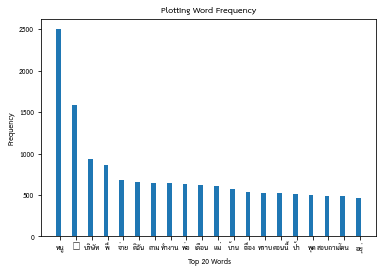

<Figure size 3600x3600 with 0 Axes>

In [56]:
import matplotlib.pyplot as plt
plt.xlabel('Top 20 Words')
plt.ylabel('Frequency')
plt.title('Plotting Word Frequency')
indexes = np.arange(len(words_names) )
width = .3
plt.bar(indexes, words_count, width)
plt.xticks(indexes + width * .3, words_names)
plt.figure(figsize=(50,50))
#fig.savefig('test2png.png', dpi=100)
#plt.figure(figsize=(30,10))
#plt.legend()
plt.savefig('data.png')  
plt.tight_layout()
plt.show()

In [57]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('C:\\Users\\LENOVO\\Documents\\LegalDoc_project4\\THSarabunNew Bold.ttf')
mpl.rc('font', family='TH Sarabun New')

In [58]:
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3627 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3648 missing 

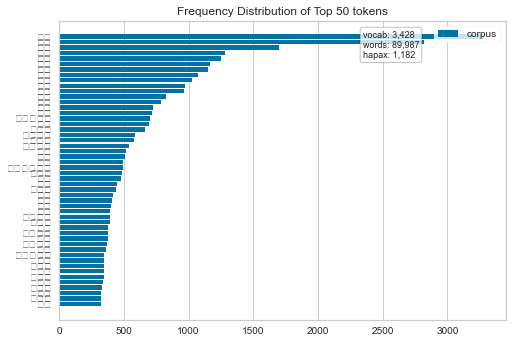

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [59]:
import matplotlib.pyplot as plt
vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(text for text in flat_list)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, font_path= path)
visualizer.fit(docs)
visualizer.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3641 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3625 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3637 missing from current fo

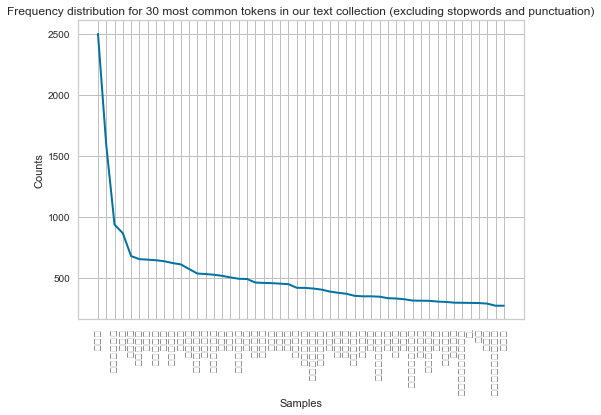

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [60]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import FreqDist
import matplotlib.pyplot as plt
remove_these = set(list(string.punctuation) + list(string.digits))
filtered_text = [w for w in flat_list if not w in remove_these]
fdist_filtered = FreqDist(filtered_text)
fdist_filtered.plot(50, title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

# Dash Board

In [61]:
from matplotlib import pyplot as plt
import matplotlib

C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3627 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3648 missing 

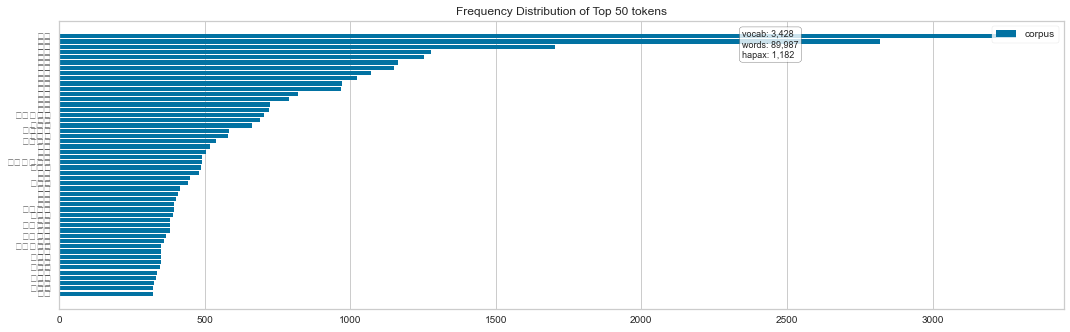

C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3641 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3625 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3637 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3656 missing 

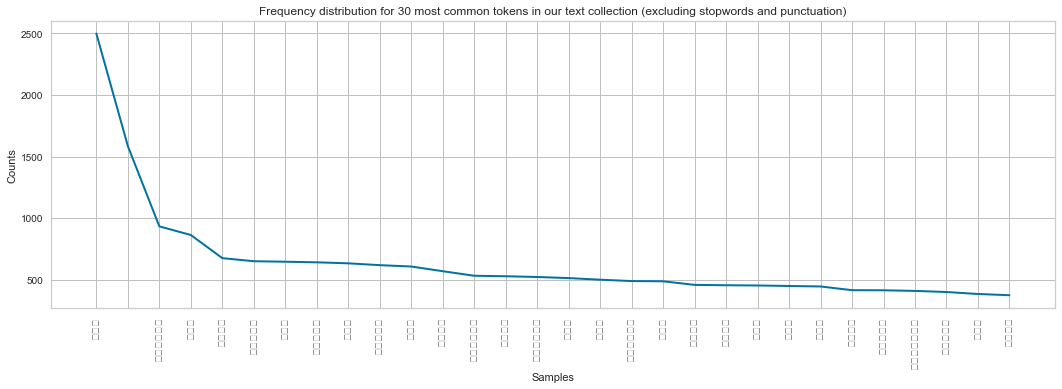

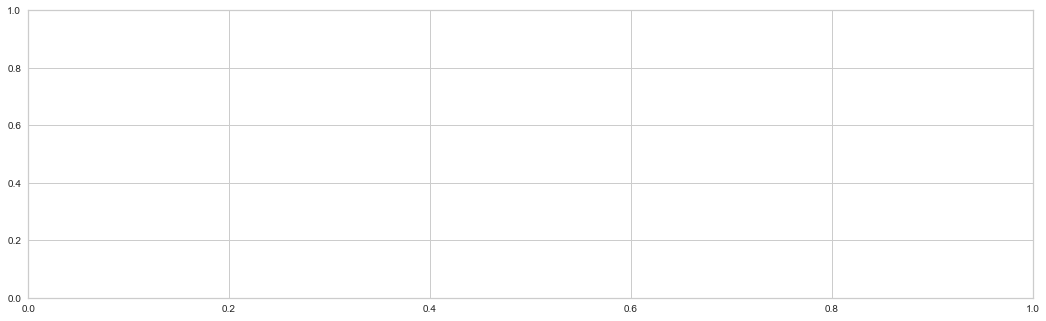

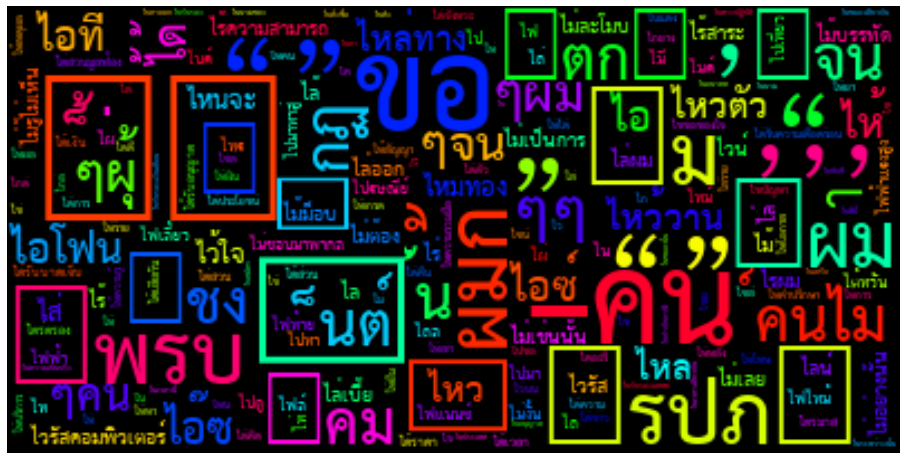

In [62]:
matplotlib.rcParams['figure.figsize'] = [18,18]
plt.subplot(3,1,1)
import matplotlib.pyplot as plt
vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(text for text in flat_list)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, font_path= path)
visualizer.fit(docs)
visualizer.show() ;
plt.subplot(3,1,2)
remove_these = set(list(string.punctuation) + list(string.digits))
filtered_text = [w for w in flat_list if not w in remove_these]
fdist_filtered = FreqDist(filtered_text)
fdist_filtered.plot(30, title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)');
plt.subplot(3,1,3)
cloud = WordCloud(font_path=path, max_font_size=80,colormap="hsv").generate_from_frequencies(bag_Q)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show() ;

## sorting by word count

# Words Cloud >> คำตอบ <<

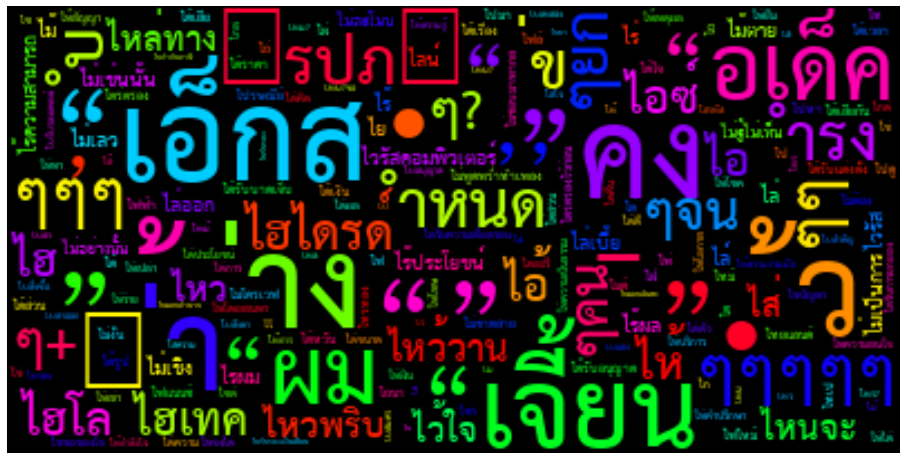

In [63]:
from collections import Counter
#dictionary=Counter(data_Q)
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(font_path=path, max_font_size=80,colormap="hsv").generate_from_frequencies(bag_A)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [64]:
#data_anw

In [65]:
freq2={}

In [66]:
flat_list2 = []
for sublist in data_anw : 
    for item in sublist:
        flat_list2.append(item)

In [67]:
for word in flat_list2:
    count=freq2.get(word,0)
    freq2[word]=count + 1

In [68]:
frequency_list2 = freq2.keys()

In [69]:
for words in frequency_list2:
    print(words + ' -> ' + str(freq2[words]))

กรม -> 62
พินิจ -> 4
ยกเลิก -> 29
บัญชี -> 74
สอบแข่งขัน -> 2
พนักงาน -> 295
ราชการ -> 9
ขึ้นบัญชี -> 5
อ้าง -> 65
ขอบเขต -> 79
ที่ประกาศ -> 2
ใช้ได้ -> 12
เขต -> 84
พื้นที่ -> 142
จึุง -> 1
สอบ -> 71
ใช้กับ -> 15
หน่วย -> 19
ศาล -> 1087
สงขลา -> 4
ร้องขอ -> 57
รจ -> 1
คณะกรรมการ -> 50
พิจารณา -> 241
คณะทำงาน -> 3
รัฐมนตรี -> 6
ว่าการ -> 62
กระทรวงยุติธรรม -> 14
เรียน -> 31
อนันต์ -> 1
กรมบังคับคดี -> 6
คดี -> 550
เจ้าหนี้ -> 444
ยื่นคำขอ -> 8
ชำระหนี้ -> 77
จำนวน -> 214
เจ้าพนักงานพิทักษ์ทรัพย์ -> 10
แบ่ง -> 54
ทรัพย์สิน -> 177
บรรดา -> 12
วัน -> 141
ส.ค. -> 7
รับเงิน -> 119
ส่วนแบ่ง -> 62
ร้อยละ -> 54
ยอด -> 43
หนี้ -> 147
งาน -> 302
เงิน -> 560
บ. -> 369
จ่าย -> 828
บางส่วน -> 6
ยังมี -> 114
ทยอย -> 1
ต่อเนื่อง -> 10
บางราย -> 4
ยื่น -> 171
คำร้องขอ -> 22
ระบบ -> 47
โอน -> 163
แบงค์ -> 61
อย่างไรก็ตาม -> 141
กอง -> 11
บริษัท -> 664
สัมพันธ์ -> 10
ทำประกัน -> 23
จำกัด -> 9
มูลหนี้ -> 3
สิทธิ -> 525
ส่วนที่เหลือ -> 5
ล้มละลาย -> 19
กองทุน -> 39
ประกันวินาศภัย -> 19
ผู้พิจารณา -> 1
เป็

การตอก -> 3
ทุจริตต่อหน้าที่ -> 4
ตรงเวลา -> 2
ปรึกษาหารือ -> 1
เป้า -> 6
สรูป -> 1
เท็จจริง -> 1
กำแพงเพชร -> 1
บัง -> 2
ตับ -> 1
ย่ำแย่ -> 1
สถานประกอบการ -> 7
อุตสาหกรรมท่องเที่ยว -> 1
ก็แล้วกัน -> 4
ไซ -> 18
ด์ -> 18
โหย -> 5
เวลาว่าง -> 1
อิอิ -> 31
อันดับ -> 5
เลยเวลา -> 3
มาสาย -> 8
ตังค์ -> 5
เอาเปรียบ -> 14
เสมอๆ -> 5
ค่าขนส่ง -> 2
เป็นช่วง -> 2
เพียงเท่านี้ -> 7
มานะ -> 5
คนดี -> 7
ความเห็นอกเห็นใจ -> 2
กลด -> 3
เอาแต่ได้ -> 1
ทางเดิน -> 1
ขึ้นศาล -> 8
ล่อ -> 16
อืม -> 7
กระมัง -> 4
! -> 8
จากกัน -> 7
นึง -> 13
ฑัณณ์ -> 1
การปรับปรุง -> 1
ยังงัย -> 18
ลุ้น -> 12
สาร -> 52
พรหมจารี -> 36
สัน -> 13
ขั้นพื้นฐาน -> 7
อิธิ -> 1
พล -> 3
ปราณี -> 30
ดูก่อน -> 14
หยุ -> 4
การวินิจฉัย -> 5
เหตุสุดวิสัย -> 11
ศบค -> 1
โรคติดต่อ -> 2
ธง -> 1
แอบ -> 7
เม้ม -> 1
แฮ่ -> 2
ล้อเล่น -> 2
เนิน -> 4
มีความสุข -> 6
ตรึกตรอง -> 2
จ่ายเงินเดือน -> 4
เครียร์ๆ -> 2
ตอนนั้น -> 3
ประนีประนอมยอมความ -> 7
คาม -> 2
ขีดฆ่า -> 2
ตามหลักการ -> 3
บานปลาย -> 1
แย้งกันอยู่ในตัว -> 2
เห่ -> 1
เข้าทำงาน -> 26
ยา

ได้เวลา -> 1
แว้ว -> 2
ยอดฮิต -> 1
จิ -> 1
ถะ -> 1
เบี้ยปรับ -> 4
กระซิบ -> 1
เนืองๆ -> 1
อาย -> 1
เข้าสู่ระบบ -> 1
รถเก๋ง -> 1
วววววววว -> 1
ซด -> 1
นิยาม -> 4
สูบฉีด -> 1
เกิดผล -> 1
แมท -> 2
เอ็กซ์ -> 1
แอลเอ -> 2
สดี -> 2
โค -> 4
โคคาอีน -> 1
เข้มข้น -> 1
แห้ง -> 1
ยาฝิ่น -> 2
ปรุงแต่ง -> 1
สุก -> 1
ต้นตำรับ -> 1
ยา -> 1
ยาแก้ไอ -> 1
ท้องเสีย -> 1
เซ -> 2
แอน -> 1
ไฮไดรด์ -> 1
เห็ด -> 1
ขี้ควาย -> 1
ทม -> 4
มัว -> 1
ลาลา -> 1
ปลื้ม -> 1
ผิดระเบียบ -> 6
ยยยย -> 3
กุมขมับ -> 1
มาลา -> 1
งานศพ -> 1
บวช -> 1
งานแต่ง -> 1
ขอแสดงความยินดี -> 2
สืบสกุล -> 1
ครรภ์ -> 1
ี่อน -> 1
เป๊ะ -> 1
ทุ่มเท -> 2
ี่อก -> 1
รักษาสุขภาพ -> 1
กลั่น -> 1
พ่อค้า -> 1
หัวหมอ -> 1
แป้ง -> 2
ๆจน -> 1
ปรับโทษ -> 1
ตม -> 1
วิ่งราวทรัพย์ -> 1
รีดเอาทรัพย์ -> 1
ฝา -> 2
เป้ -> 1
การฝาก -> 1
ชอบแล้ว -> 2
ปั๊ม -> 1
มีมูล -> 4
ทันใจ -> 1
เปิดเผยความลับ -> 1
ทัวริสต์ -> 1
คบชู้ -> 1
ได้รูป -> 1
ห้องนอน -> 1
สองต่อสอง -> 1
ฉันท์ -> 3
นึกไม่ออก -> 1
นึกถึง -> 1
ละคร -> 1
เปาบุ้นจิ้น -> 1
?คง -> 1
ความพยายาม -> 2
ภูมิใจ -

In [70]:
results2 = []

In [71]:
for word in frequency_list2:
    tuple = (word, freq2[word])
    results2.append(tuple)

In [72]:
byFreq2 = sorted(results2, key=lambda word: word[1], reverse=True)

In [86]:
byFreq2[:50]

[('ทนาย', 1153),
 ('ศาล', 1087),
 ('นาย', 968),
 ('เรื่อง', 942),
 ('สัญญา', 917),
 ('ที่ดิน', 847),
 ('จ่าย', 828),
 ('พนง.', 716),
 ('เคส', 699),
 ('ตอบ', 694),
 ('บริษัท', 664),
 ('เช่าช่วง', 664),
 ('เจรจา', 642),
 ('เงิน', 560),
 ('คดี', 550),
 ('เลิกจ้าง', 540),
 ('ถาม', 536),
 ('สิทธิ', 525),
 ('กฎหมาย', 513),
 ('ฟ้อง', 488),
 ('ดู', 467),
 ('ตกลง', 462),
 ('บังคับ', 446),
 ('มาตรา', 446),
 ('เจ้าหนี้', 444),
 ('ทำงาน', 432),
 ('ชัด', 417),
 ('ปพพม', 409),
 ('ความจริง', 407),
 ('แจ้ง', 391),
 ('บ.', 369),
 ('ค่าแรง', 361),
 ('แทน', 358),
 ('บ้าน', 354),
 ('แรงงาน', 332),
 ('เบื้องต้น', 329),
 ('ขอร้อง', 327),
 ('เดือน', 326),
 ('ขอให้', 313),
 ('ค่าชดเชย', 313),
 ('บุตร', 309),
 ('ไม่ต้อง', 306),
 ('งาน', 302),
 ('ย้าย', 298),
 ('บอกเลิก', 296),
 ('พนักงาน', 295),
 ('ปัญหา', 290),
 ('อำนาจ', 288),
 ('ระบุ', 288),
 ('คำพิพากษา', 283)]

In [87]:
words_A_no = byFreq2[:50]

In [88]:
f = open("words_A_no.txt", "w")
f.write("\n".join(map(lambda x: str(x), words_A_no)))
f.close()

In [74]:
words_names2=[]
words_count2=[]
for (word, freq2) in byFreq2[:20]:
    print (word, freq2)
    words_names2.append(word)
    words_count2.append(freq2)

ทนาย 1153
ศาล 1087
นาย 968
เรื่อง 942
สัญญา 917
ที่ดิน 847
จ่าย 828
พนง. 716
เคส 699
ตอบ 694
บริษัท 664
เช่าช่วง 664
เจรจา 642
เงิน 560
คดี 550
เลิกจ้าง 540
ถาม 536
สิทธิ 525
กฎหมาย 513
ฟ้อง 488


In [75]:
import numpy as np

In [76]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('C:\\Users\\LENOVO\\Documents\\LegalDoc_project4\\THSarabunNew Bold.ttf')
mpl.rc('font', family='TH Sarabun New')

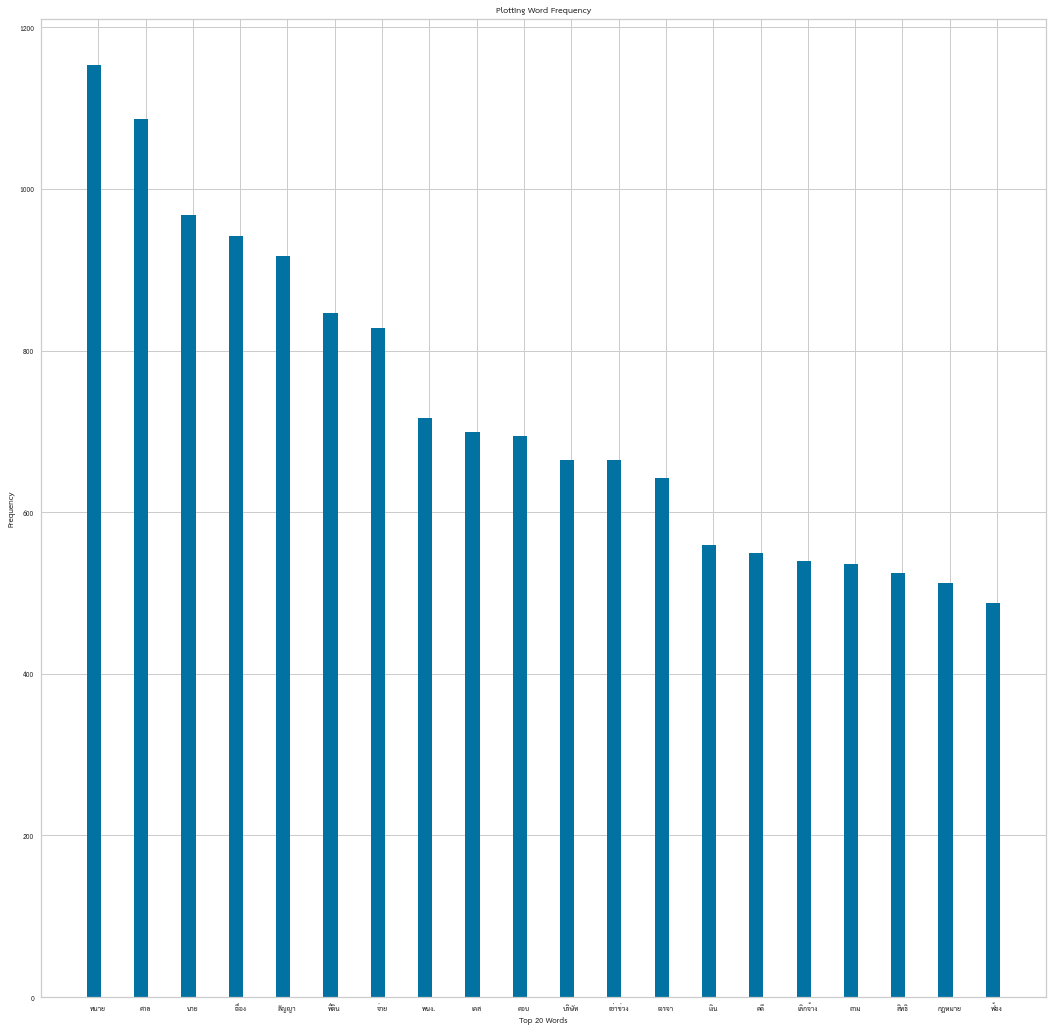

<Figure size 3600x3600 with 0 Axes>

In [77]:
import matplotlib.pyplot as plt

plt.xlabel('Top 20 Words')
plt.ylabel('Frequency')
plt.title('Plotting Word Frequency')
indexes2 = np.arange(len(words_names2) )
width2 = .3
plt.bar(indexes2, words_count2, width2)
plt.xticks(indexes2 + width2 * .3, words_names2)
plt.figure(figsize=(50,50))
#fig.savefig('test2png.png', dpi=100)
#plt.figure(figsize=(30,10))
#plt.legend()
plt.savefig('data2.png')  
plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


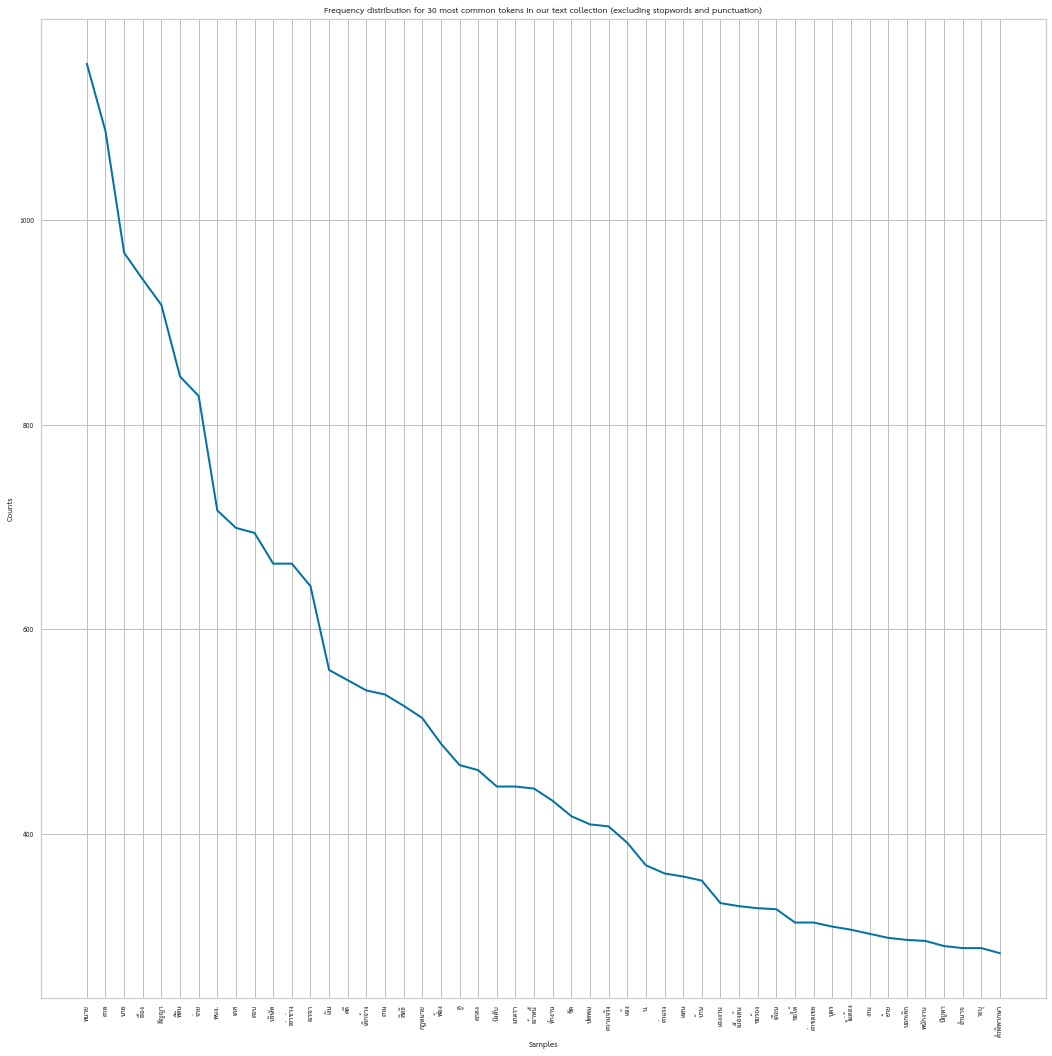

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [78]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import FreqDist

import matplotlib.pyplot as plt
remove_these2 = set(list(string.punctuation) + list(string.digits))
filtered_text2 = [w for w in flat_list2 if not w in remove_these2]
fdist_filtered2= FreqDist(filtered_text2)
fdist_filtered2.plot(50, title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

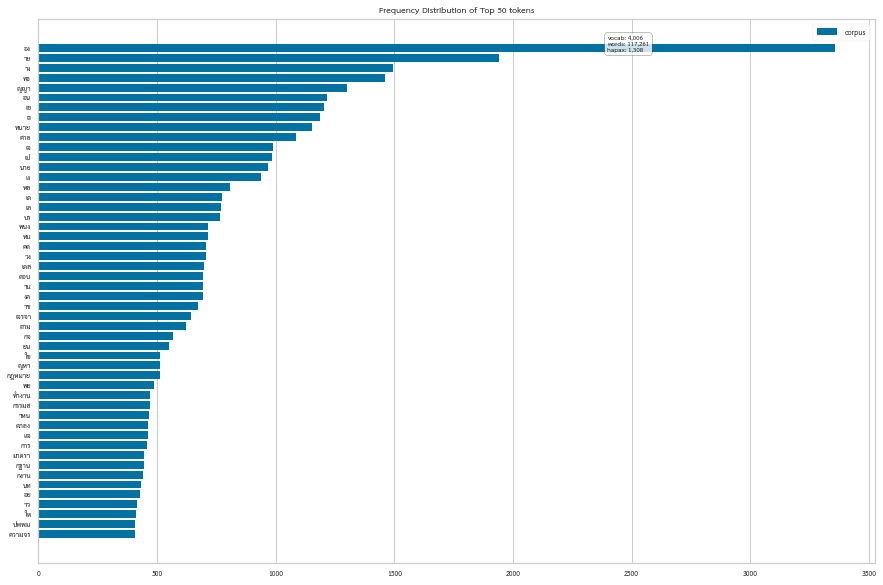

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [79]:
import matplotlib.pyplot as plt
vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(text for text in flat_list2)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, size=(1080, 720), font_path= path)
visualizer.fit(docs)
visualizer.show()

# Dash Board

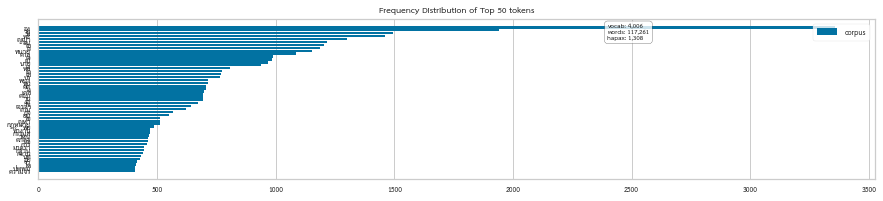

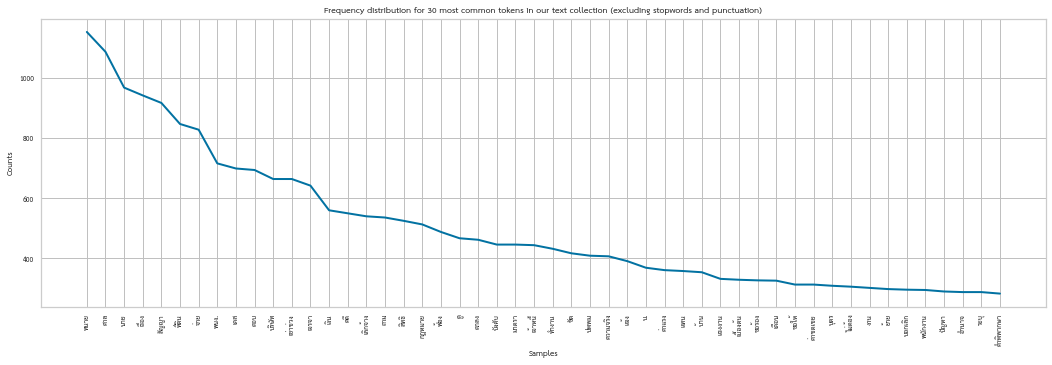

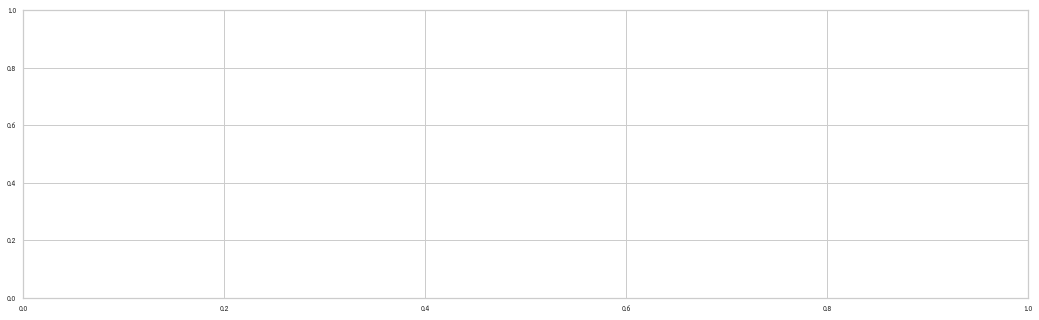

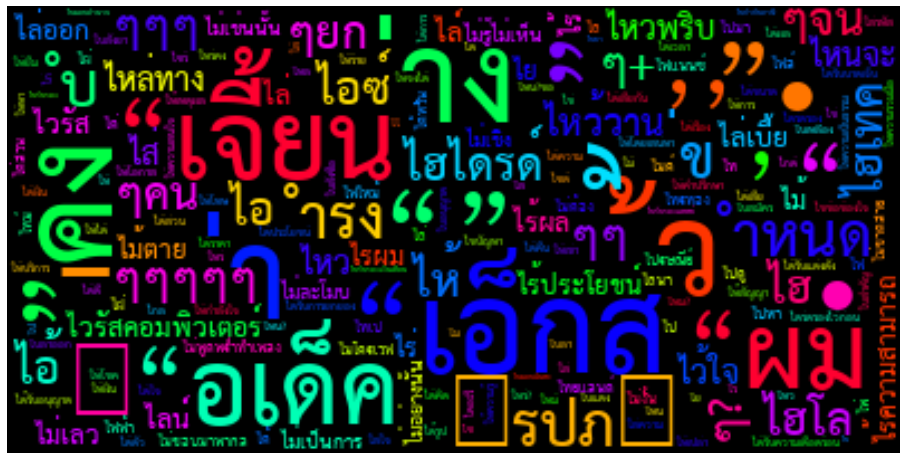

In [80]:
matplotlib.rcParams['figure.figsize'] = [18,18]
plt.subplot(3,1,1)
import matplotlib.pyplot as plt
vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(text for text in flat_list2)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, size=(1080, 720), font_path= path)
visualizer.fit(docs)
visualizer.show() ;
plt.subplot(3,1,2)
import matplotlib.pyplot as plt
remove_these2 = set(list(string.punctuation) + list(string.digits))
filtered_text2 = [w for w in flat_list2 if not w in remove_these2]
fdist_filtered2= FreqDist(filtered_text2)
fdist_filtered2.plot(50, title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)') ;
plt.subplot(3,1,3)
cloud = WordCloud(font_path=path, max_font_size=80,colormap="hsv").generate_from_frequencies(bag_A)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show() ;